# Handwriting recognition

## Data import and visualization

Import the MNIST train dataset ([https://en.wikipedia.org/wiki/MNIST_database](https://en.wikipedia.org/wiki/MNIST_database))

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# This dataset is contained in the sample data directory of Google Colab online runtimes
data = np.genfromtxt('/Users/davide/Desktop/Università/Magistrale - PoliMi/Anno 1 - 2023:2024/Semestre 1/Numerical Analysis/Laboratory/Lab 2/mnist_train_small.csv', delimiter=',')
data.shape

(20000, 785)

Store the data in a matrix and the labels in a vector

In [2]:
labels_full = data[:,0]
A_full = data[:,1:]
labels_full.shape, A_full.shape

((20000,), (20000, 784))

Visualize the first 30 pictures with the corresponding labels

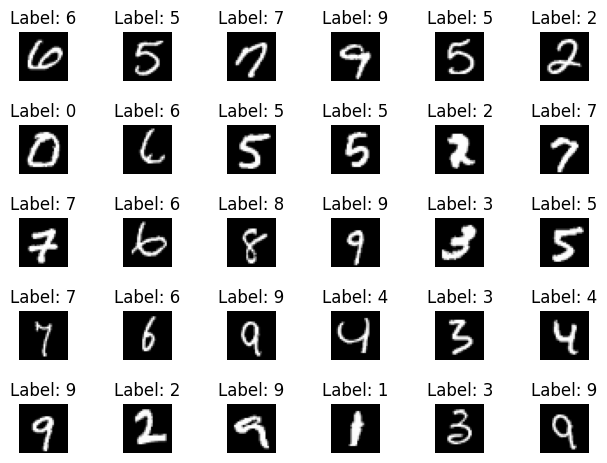

In [3]:
fig, axes = plt.subplots(nrows=5, ncols=6)
fig.tight_layout()
plt.gray()

for i in range(30):
    axes[i // 6][i % 6].imshow(A_full[i].reshape(28, 28))
    axes[i // 6][i % 6].set_title("Label: " + str(int(labels_full[i])))
    axes[i // 6][i % 6].axis("off")

Visualize the first 30 pictures corresponding the digit "9"

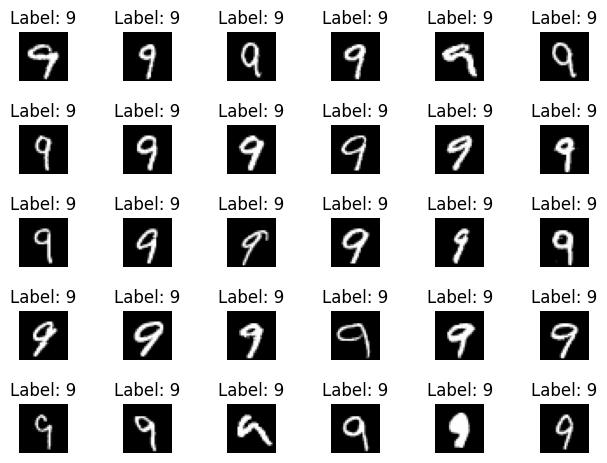

In [4]:
fig, axes = plt.subplots(nrows=5, ncols=6)
fig.tight_layout()
plt.gray()
i = 0
index = 0

while i < 30:
    if labels_full[index] != 9:
        index += 1
        continue
    axes[i // 6][i % 6].imshow(A_full[index].reshape(28, 28))
    axes[i // 6][i % 6].set_title("Label: 9")
    axes[i // 6][i % 6].axis("off")
    index += 1
    i += 1

### Classification of two digits (0 and 9)

We now focus on the digits 0 and 9 only. Build a reduced training dataset containing only images corresponding to these digits.

In [5]:
training_data = list()
training_label = list()
for i, data in enumerate(A_full):
    if int(labels_full[i]) != 0 and int(labels_full[i]) != 9:
        continue
    training_data.append(A_full[i])
    training_label.append(labels_full[i])
training_label = np.array(training_label)
training_data = np.array(training_data)
training_data.shape, training_label.shape

((3985, 784), (3985,))

Plot the first 30 training images.

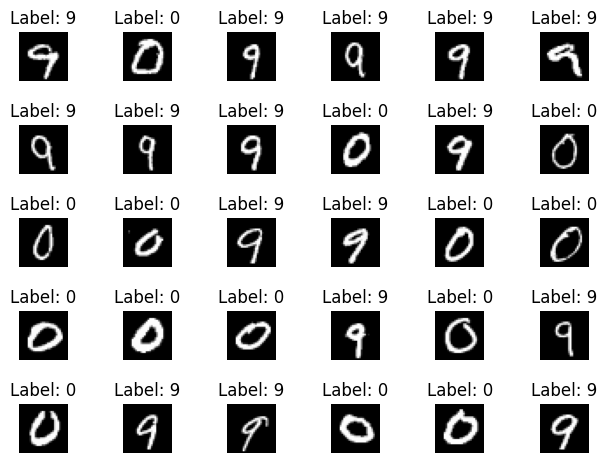

In [6]:
fig, axes = plt.subplots(nrows=5, ncols=6)
fig.tight_layout()
plt.gray()

for i in range(30):
    axes[i // 6][i % 6].imshow(training_data[i].reshape(28, 28))
    axes[i // 6][i % 6].set_title("Label: " + str(int(training_label[i])))
    axes[i // 6][i % 6].axis("off")

Compute and visualize the average of the training data

[False  True False ...  True  True False] [0. 0. 0. ... 0. 0. 0.]


array([9., 9., 9., ..., 9., 9., 9.])

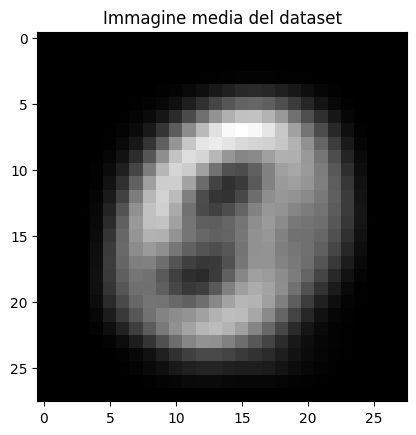

In [7]:
mean_mat = np.zeros((28, 28))
for mat in training_data:
    mean_mat += mat.reshape((28, 28))
mean_mat /= training_data.shape[0]
plt.imshow(mean_mat)
plt.title("Immagine media del dataset")

mask = np.logical_or(training_label == 0.0, False) # la mask è un array binario --> prendi o non prendi
print(mask, training_label[mask]) # ecco come usare le mask di numpy --> molto utile per filtrare i dati in fretta

training_label[training_label == 9]

# nel primo caso sono rimasti solo gli zeri, nella seconda solo i 9

Perform PCA on the data. Then, plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

In [8]:
h = np.identity(training_data.shape[0]) - (1/training_data.shape[0]) * np.ones((training_data.shape[0], training_data.shape[0]))
A_center = h @ training_data

A_cov = (A_center.T @ A_center) / (training_data.shape[1] - 1) # calcolo la matrice di covarianza

u, s, vt = np.linalg.svd(A_cov)
# il resto è uguale --> soliti grafici dei singolar values

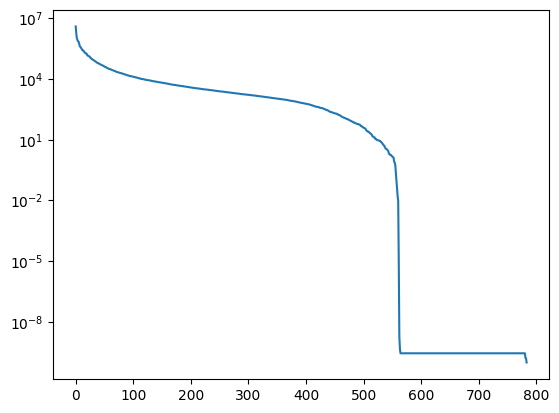

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, squeeze=False)
axes[0][0].set_yscale("log")
axes[0][0].plot([x for x in range(s.shape[0])], [s[i] for i in range(s.shape[0])])

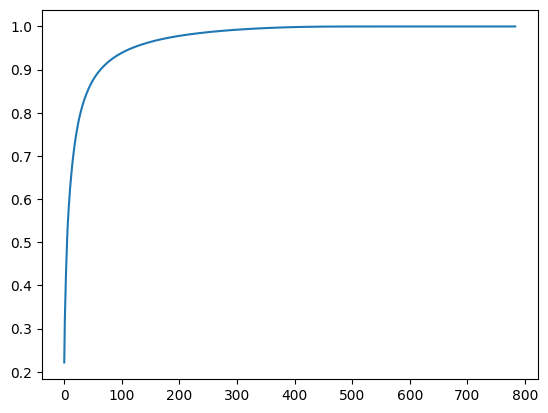

In [10]:
plt.plot([x for x in range(s.shape[0])], [sum(s[0:i + 1]) / sum(s) for i in range(s.shape[0])])

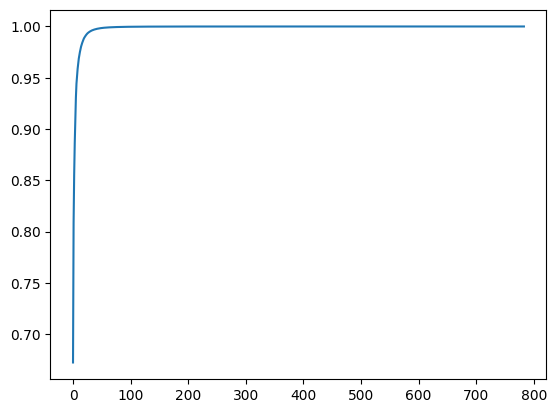

In [11]:
plt.plot([x for x in range(s.shape[0])], [sum(np.square(s[0:i + 1])) / sum(np.square(s)) for i in range(s.shape[0])])

Visualize the first 30 principal components --> columns of vt.T showed as images, not direction in this case

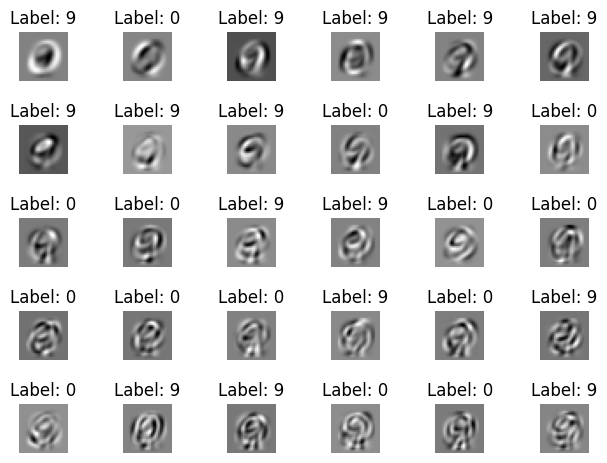

In [12]:
fig, axes = plt.subplots(nrows=5, ncols=6)
fig.tight_layout()
plt.gray()

for i in range(30):
    axes[i // 6][i % 6].imshow(vt.T[:, i].reshape(28, 28)) # sto disegnando il peso dei componenti principali
    axes[i // 6][i % 6].set_title("Label: " + str(int(training_label[i])))
    axes[i // 6][i % 6].axis("off")
# come vedi, più diminuiscono i singolar values e più le frequenze di mischiano. All'inizio abbiamo alte frequenze dominanti, poi no

Compute the first 2 features of the first image projected on the PC space

In [13]:
training_data[0] @ vt.T[:, 0], training_data[0] @ vt.T[:, 1]

(53.14454591826385, 173.86785032054837)

Find the PCA matrix, projecting all images on the new PC subspace

In [14]:
PCA = training_data @ vt.T
PCA

array([[ 5.31445459e+01,  1.73867850e+02,  1.38393692e+03, ...,
        -1.69155172e-10,  1.03195637e-10, -6.96024723e-12],
       [ 1.94331562e+03, -7.89404716e+01,  7.51271586e+02, ...,
        -1.77816677e-09,  1.00045979e-09, -8.57110823e-11],
       [-5.33179816e+02, -5.58275143e+02,  5.17984625e+02, ...,
        -2.02871230e-10,  1.17371512e-10, -1.02650102e-11],
       ...,
       [ 1.66953988e+03, -1.25187418e+03,  6.54537498e+02, ...,
        -5.92620827e-10,  3.09718153e-10, -3.06371639e-11],
       [ 1.12140469e+03,  6.50829794e+02,  9.80522248e+02, ...,
        -3.70078378e-10,  2.34107882e-10, -1.39420624e-11],
       [-1.28492339e+02, -1.06000575e+03,  4.46208610e+02, ...,
        -3.97370094e-10,  2.32498334e-10, -2.35908206e-11]])

Text(0.5, 1.0, 'Label: 9')

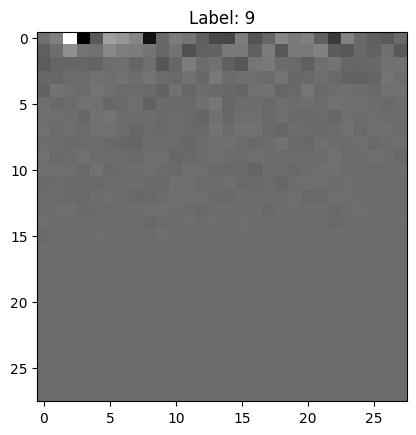

In [23]:
plt.imshow((PCA[0] / np.max(PCA[0])).reshape(28, 28))
plt.title("Label: " + str(int(training_label[0])))
# ecco disegnata la prima immagine nello spazio dei PC (dopo la proiezione) --> come vedi, dopo la prima riga è tutto rumore inutile

Create a scatterplot for the first 2 principal components of all the training images, grouped by label. Consider only the first 500 pictures.

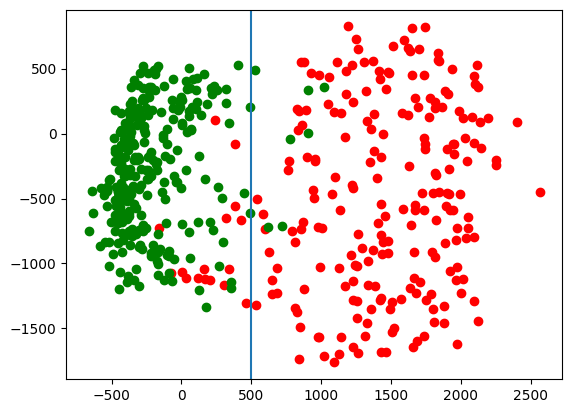

In [15]:
zeros, nines = list(), list()
for i, row in enumerate(PCA):
    if i == 500:
        break
    if int(training_label[i]) == 0:
        zeros.append([row[0], row[1]])
    else:
        nines.append([row[0], row[1]])

plt.scatter([x[0] for x in zeros], [x[1] for x in zeros], color="r")
plt.scatter([x[0] for x in nines], [x[1] for x in nines], color="g")

tresh = 500 # threshold trovato empiricamente dal plot --> in questo caso, sulle x hai messo il primo PC
plt.axvline(tresh)

Define a classifier, by fixing a threshold on the first principal component. Then, test the classifier on the MNIST test dataset. Compute the number of true/false positive/negative for both the digits (confusion matrix) and the accuracy of the classifier.

In [16]:
pred = list()
for row in PCA:
    if row[0] > tresh:
        pred.append(0.0)
    else:
        pred.append(9.0)
pred = np.array(pred)
pred

array([9., 0., 9., ..., 0., 0., 9.])

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score # non li usi perché fai tutto con numpy --> se fosse più complicato potresti usarli

conf_mat = [[0, 0], [0, 0]]
conf_mat[0][0] = np.sum(np.logical_and(pred == 0, training_label == 0))
conf_mat[0][1] = np.sum(np.logical_and(pred == 9, training_label == 0))
conf_mat[1][0] = np.sum(np.logical_and(pred == 0, training_label == 9))
conf_mat[1][1] = np.sum(np.logical_and(pred == 9, training_label == 9))

acc = np.sum(np.logical_or(pred == training_label, False)) / len(pred)

print("\nConfusion Matrix:\n", conf_mat[0], "\n", conf_mat[1])
print("\nAccuracy:\n", np.round(acc, 2))

#true: 0, predicted: 0 (value: 1848, position [0, 0])
#true: 0, predicted: 9 (value: 114, position [0, 1])
#true: 9, predicted: 0 (value: 65, position [1, 0])
#true: 9, predicted: 9 (value: 1958, position [1, 1])


Confusion Matrix:
 [1848, 114] 
 [65, 1958]

Accuracy:
 0.96


In [18]:
# accuracy e confusion matrix avresti dovuto calcolarli sul dataset di test, non sullo stesso --> occhio a non inserire bias